In [2]:
#https://mubaris.com/posts/kmeans-clustering/
#Program digunakan untuk clustering data Covid 19 Indo 11 April 2020, 
#34 propinsi untuk kasus positif (kolom1) dan sembuh (kolom 2)
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# Importing the dataset
data = pd.read_csv('Cov11Ap.csv')
print(data.shape)
data.head()

(68, 2)


,V1,V2
0,8,4
1,177,55
2,359,33
3,9,2
4,8,1


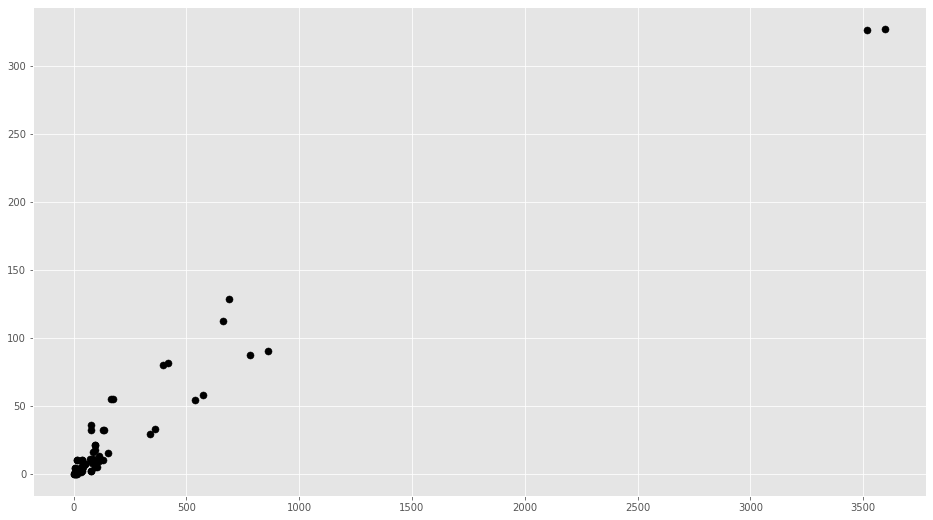

In [3]:
# Tulis nilai dan gambar
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=50)

In [4]:
# Hitung jarak Euclid
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [5]:
# banyaknya klater
k = 3
# X koordinat random pusat klaster 
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y koordinat y untuk pusat 
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[ 159. 3279.]
 [ 817. 3022.]
 [3463. 2461.]]


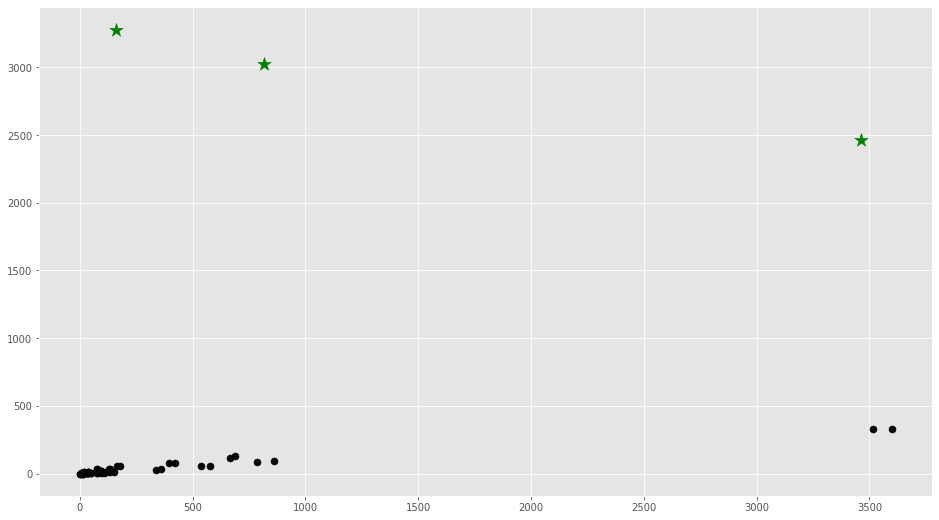

In [6]:
# Gambarkan data dengan pusat klaster
plt.scatter(f1, f2, c='#050505', s=50)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [ ]:
# Simpan nilai pusat dan diupdate
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
